In [633]:
# import all the necessary libraries like pandas, matplotlib, seaborn, sklearn, plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [634]:
# set all the necessary configurations for the graphs
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette("muted")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

*Loading the Data*

In [635]:
train_data = pd.read_csv(r'C:\Users\Home\Desktop\Machine_Learning\House Prices\house-prices-advanced-regression-techniques\train.csv')
test_data = pd.read_csv(r'C:\Users\Home\Desktop\Machine_Learning\House Prices\house-prices-advanced-regression-techniques\test.csv')

In [636]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Droping the Id feature from the train and test.

In [637]:
train_data_id = train_data['Id']
test_data_id = test_data['Id']
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

- Count the number of feuatures


In [638]:
print(f"Number of features: {train_data.shape[1]}")

Number of features: 80


# Part 1: <br> *Analyzing the data - EDA*

- *Get the data types of the columns in the training dataset*

In [639]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

None

Most of the data is from type Object

## *Data Cleaning*

In [640]:

def show_missing_values_stat(data):
    print("Missing values in the dataset:")
    print("-----------------------------------------")
    print("Total Rows: ", len(data))
    print("_________________________________________")
    # Display missing values in each column of the training dataset
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(train_data)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
    print(missing_data.head(20))
    
    print("\n\nTotal missing values: ", missing_data['Missing Values'].sum())
    print("-----------------------------------------")

    
    
show_missing_values_stat(train_data)

Missing values in the dataset:
-----------------------------------------
Total Rows:  1460
_________________________________________
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
MSSubClass                 0    0.000000


Tota

### we can see that there are missing values in all the features above :
* LotFrontage - 259 
* Alley - 1369 
* MasVnrType - 872 <br>.<br>.<br>.
* MiscFeature - 1406

Total of *19* features with missing values
- 3 of float64
- 16 of object

 - we can see that a lot of the data is missing hance it's will be very hard to fill the missing part and might give us a false information

In [641]:
def drop_highly_missing_features(data, fetures_to_drop):
    data = data.drop(fetures_to_drop, axis=1)
    return data


def find_features_with_missing_values_threshold(data, threshold):
    missing_values = data.isnull().sum()
    missing_percentage = (missing_values / len(train_data)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
    features_to_drop = missing_data[missing_data['Percentage'] > threshold].index
    return features_to_drop

In [642]:
# Set the threshold for missing values to remove
threshold = 80
# for 80 it return # ["Alley", "PoolQC", "Fence", "MiscFeature"]
drop_features = find_features_with_missing_values_threshold(train_data, threshold) 


train_data = drop_highly_missing_features(train_data, drop_features)

test_data = drop_highly_missing_features(test_data, drop_features)

print("Remove this features: ", drop_features)

Remove this features:  Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')


- ### Check the impact of dropping features that have less than 20% data

In [643]:
show_missing_values_stat(train_data)

Missing values in the dataset:
-----------------------------------------
Total Rows:  1460
_________________________________________
              Missing Values  Percentage
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493
Fireplaces                 0    0.000000
KitchenQual                0    0.000000
KitchenAbvGr               0    0.000000
BedroomAbvGr               0    0.000000
HalfBath                   0    0.000000


Tota

## *separate the numerical and categorical columns* ##

In [644]:
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(include=[object])

test_data_num = test_data.select_dtypes(include=[np.number])
test_data_cat = test_data.select_dtypes(include=[object])

# Part 2: <br>*Handling Missing Data*

### *use a heat map on the numerical data to see the correlation between the features*

In [645]:
show_graphs = True

In [ ]:
import sweetviz as sw
if False:
    usedcars_report = sw.analyze(train_data)
    usedcars_report.show_notebook(layout='vertical')

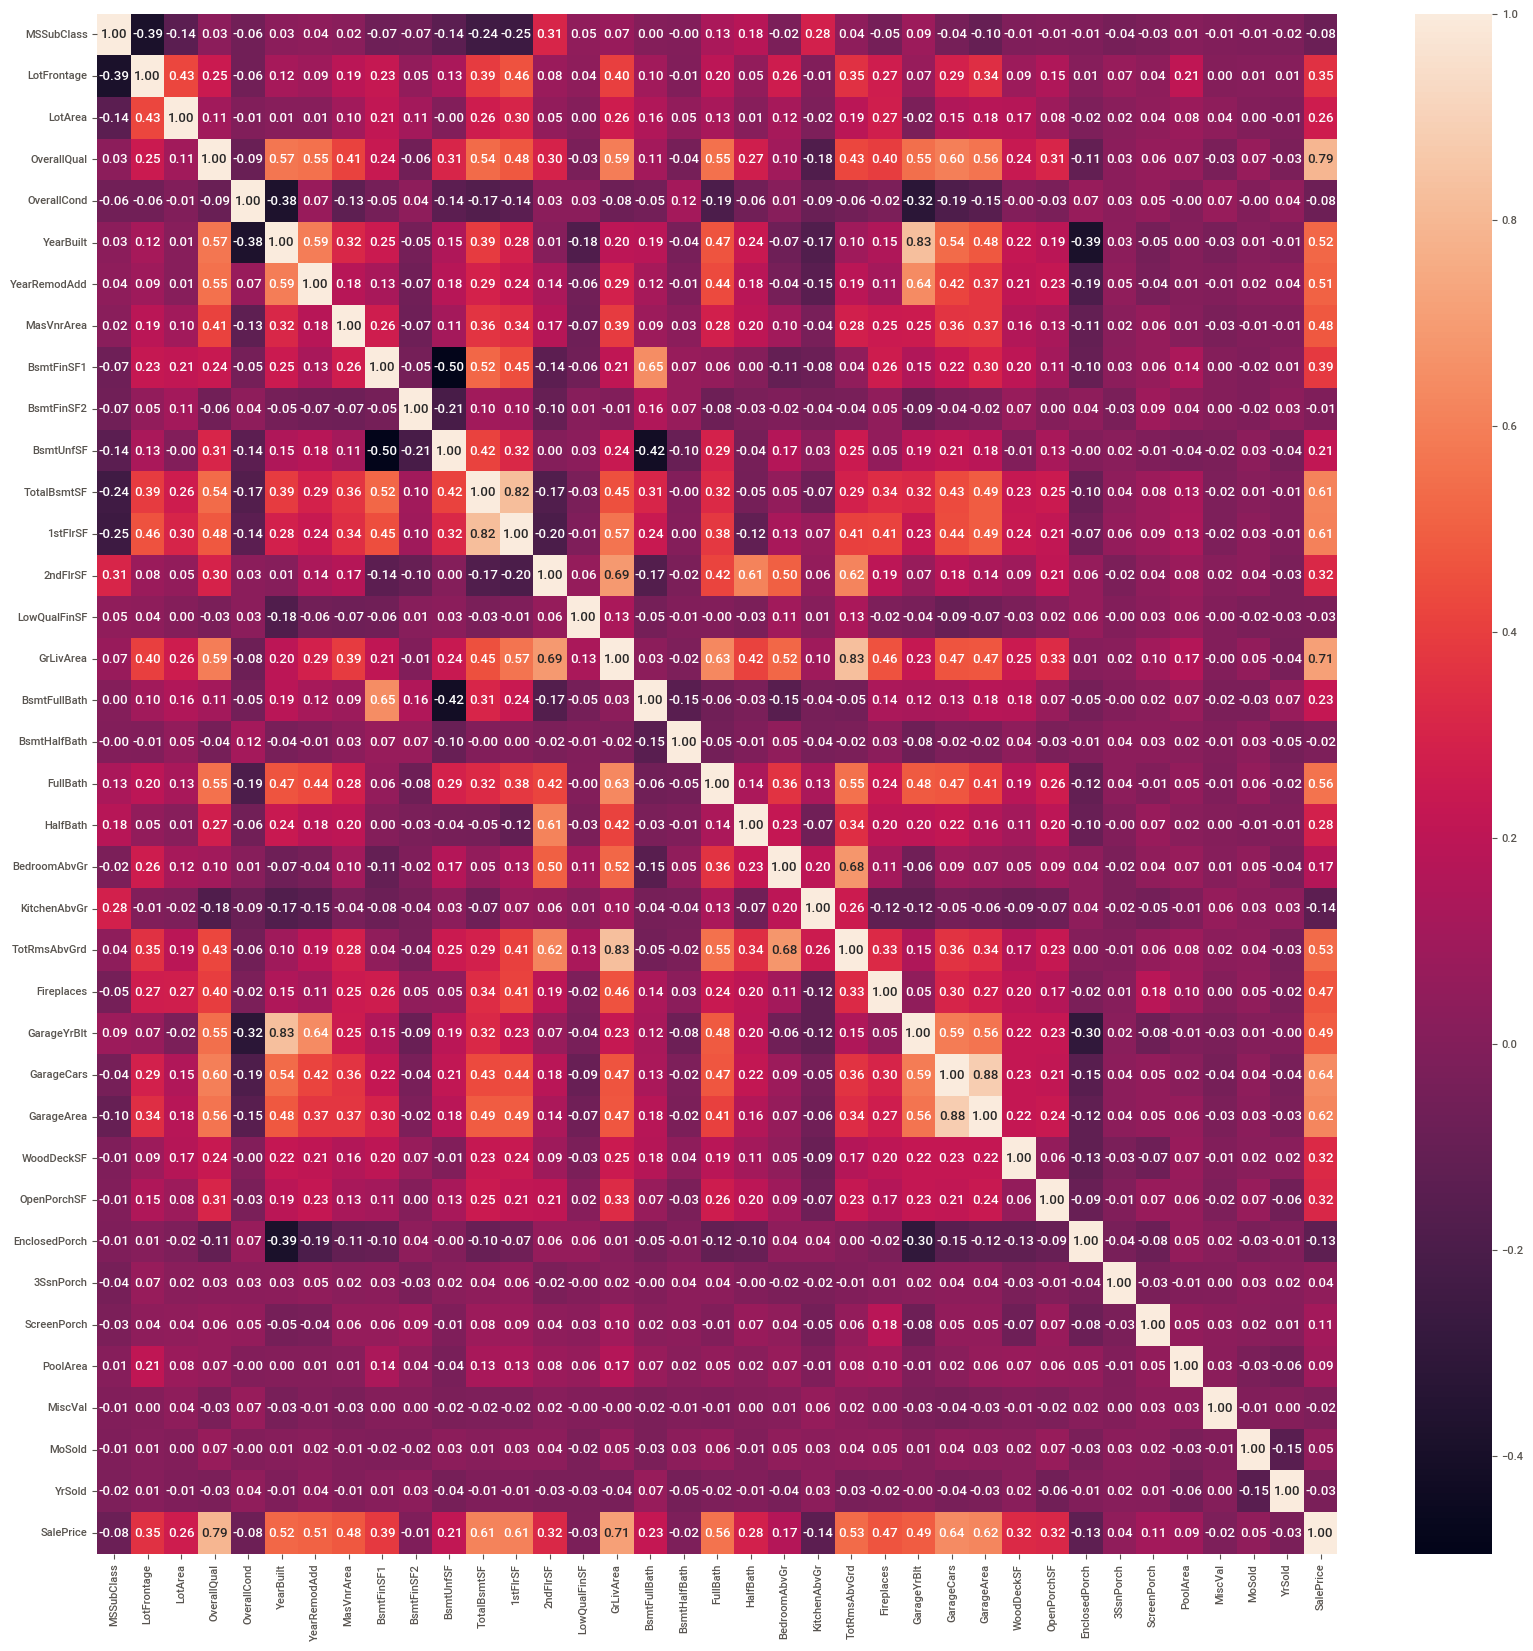

In [647]:
def show_corr_mat(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.show()

if show_graphs:
    show_corr_mat(train_data_num)

### low correaltion features: 
 <br>YrSold------------0.03
 <br>LowQualFinSF----0.03
 <br>MiscVal-----------0.02
 <br>MiscVal-----------0.02
 <br>BsmtFinType2-----0.01
 <br>BsmtHalfBath-----0.02

In [648]:
def drop_from_data_set(df, cols: list):
    df.drop(cols, axis=1, inplace=True)

In [649]:
drop_from_data_set(test_data_num, ["YrSold","LowQualFinSF","MiscVal","MiscVal","BsmtHalfBath","BsmtFinSF2"])
drop_from_data_set(train_data_num, ["YrSold","LowQualFinSF","MiscVal","MiscVal","BsmtHalfBath","BsmtFinSF2"])
print(test_data_num.shape)
print(train_data_num.shape)
#

(1459, 31)
(1460, 32)


- The diffrence between the number of features is beacuse the test_data doesn't have the SalePrice feature in it

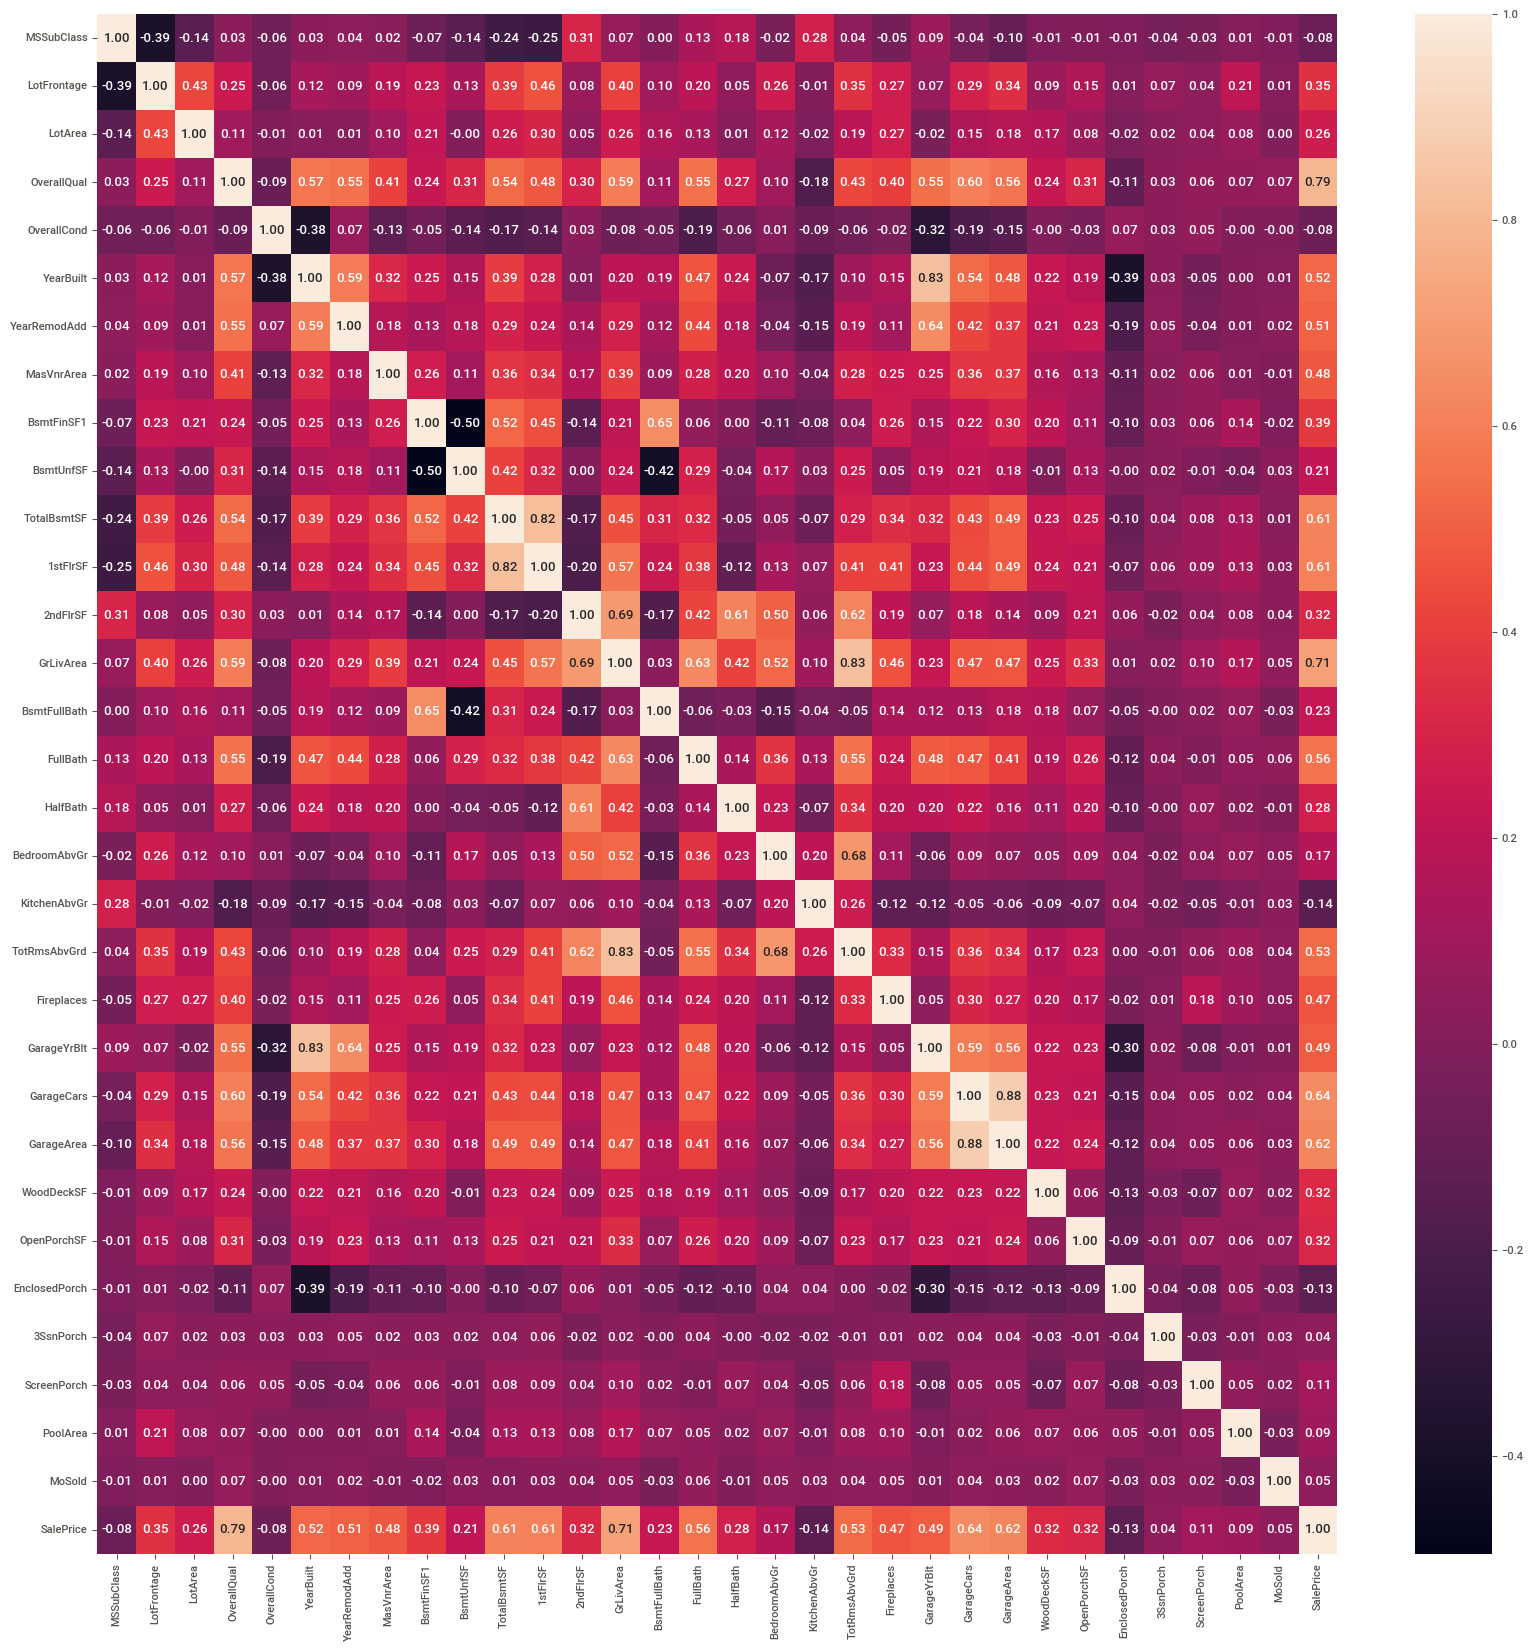

In [650]:
if show_graphs:
    show_corr_mat(train_data_num)

- *Handling Missing Values for Numerical Features*

In [651]:
# fill missing numerical values with median
def handle_missing_values_numerical(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column] = data[column].fillna(data[column].mean()) 
    return data

- *Handling Missing Values for Categorical Features*

In [652]:
# Fill missing categorical values with most frequent value
def handle_missing_values_categorical(data):
    for column in data.select_dtypes(include=[object]).columns:
        data[column] = data[column].fillna(data[column].mode()[0])
    return data

In [653]:
train_data_num = handle_missing_values_numerical(train_data_num)
train_data_cat = handle_missing_values_categorical(train_data_cat)

test_data_num = handle_missing_values_numerical(test_data_num)
test_data_cat = handle_missing_values_categorical(test_data_cat)

In [654]:
print("\nMissing values in the training dataset after filling:")
print(train_data_num.isnull().sum().sum() + train_data_cat.isnull().sum().sum())


print("\nMissing values in the test dataset after filling:")
print(test_data_num.isnull().sum().sum() + test_data_cat.isnull().sum().sum())


Missing values in the training dataset after filling:
0

Missing values in the test dataset after filling:
0


- Convert Categorical Features to Numeric Using One-Hot Encoding

In [655]:
# encode the Bsmt__ features to numerical values
def encode_ex_to_po(df, feature):
    df[feature] = df[feature].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    return df[feature]

# Function to encode 'Gd' to 'No' rating
def encode_gd_to_no(df, feature):
    df[feature] = df[feature].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, np.nan: -1})
    return df[feature]

# Function to encode 'GLQ' to 'Unf' rating
def encode_glq_to_unf(df, feature):
    df[feature] = df[feature].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})
    return df[feature]

# Function to encode 'Typ' to 'Sal' rating
def encode_typ_to_sal(df, feature):
    df[feature] = df[feature].map({'Typ': 5, 'Min1': 4, 'Min2': 3, 'Mod': 2, 'Maj1': 1, 'Maj2': 1, 'Sev': 0, 'Sal': 0, np.nan: -1})
    return df[feature]

# Function to encode fence quality
def encode_fence_quality(df, feature):
    df[feature] = df[feature].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0})
    return df[feature]

# Function to encode garage finish
def encode_garage_finish(df, feature):
    df[feature] = df[feature].map({'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0})
    return df[feature]

# Function to encode heating quality
def encode_heating_quality(df, feature):
    df[feature] = df[feature].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    return df[feature]

# Function to encode pool quality
def encode_pool_quality(df, feature):
    df[feature] = df[feature].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0})
    return df[feature]

# Function to encode lot shape
def encode_lot_shape(df, feature):
    df[feature] = df[feature].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0})
    return df[feature]

# Function to encode basement condition
def encode_basement_condition(df, feature):
    df[feature] = df[feature].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})
    return df[feature]

# Function to encode electrical system
def encode_electrical(df, feature):
    df[feature] = df[feature].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0, np.nan: -1})
    return df[feature]

    encode_fence_quality


In [656]:
# def safe_encode_feature(df, feature, encode_function):
#     if feature in df.columns:
#         df[feature] = encode_function(df, feature)
#         return df
#     else:
#         pass

In [657]:
print(train_data_cat.shape)
print(test_data_cat.shape)

(1460, 39)
(1459, 39)


In [658]:
# Encoding for train_df categorical features
# train_data_cat['ExterQual'] = encode_ex_to_po(train_data_cat, 'ExterQual')
# train_data_cat['BsmtExposure'] = encode_gd_to_no(train_data_cat, 'BsmtExposure')
# train_data_cat['BsmtFinType1'] = encode_glq_to_unf(train_data_cat, 'BsmtFinType1')
# train_data_cat['Functional'] = encode_typ_to_sal(train_data_cat, 'Functional')
# # train_data_cat['Fence'] = encode_fence_quality(train_data_cat, 'Fence')
# train_data_cat['GarageFinish'] = encode_garage_finish(train_data_cat, 'GarageFinish')
# train_data_cat['HeatingQC'] = encode_heating_quality(train_data_cat, 'HeatingQC')
# # train_data_cat['PoolQC'] = encode_pool_quality(train_data_cat, 'PoolQC')
# train_data_cat['LotShape'] = encode_lot_shape(train_data_cat, 'LotShape')
# train_data_cat['BsmtCond'] = encode_basement_condition(train_data_cat, 'BsmtCond')
# train_data_cat['Electrical'] = encode_electrical(train_data_cat, 'Electrical')

# # Encoding for test_df categorical features
# test_data_cat['ExterQual'] = encode_ex_to_po(test_data_cat, 'ExterQual')
# test_data_cat['BsmtExposure'] = encode_gd_to_no(test_data_cat, 'BsmtExposure')
# test_data_cat['BsmtFinType1'] = encode_glq_to_unf(test_data_cat, 'BsmtFinType1')
# test_data_cat['Functional'] = encode_typ_to_sal(test_data_cat, 'Functional')
# # test_data_cat['Fence'] = encode_fence_quality(test_data_cat, 'Fence')
# test_data_cat['GarageFinish'] = encode_garage_finish(test_data_cat, 'GarageFinish')
# test_data_cat['HeatingQC'] = encode_heating_quality(test_data_cat, 'HeatingQC')
# # test_data_cat['PoolQC'] = encode_pool_quality(test_data_cat, 'PoolQC')
# test_data_cat['LotShape'] = encode_lot_shape(test_data_cat, 'LotShape')
# test_data_cat['BsmtCond'] = encode_basement_condition(test_data_cat, 'BsmtCond')
# test_data_cat['Electrical'] = encode_electrical(test_data_cat, 'Electrical')

In [659]:
print(train_data_cat.shape)
print(test_data_cat.shape)

(1460, 39)
(1459, 39)


- concat the train and the test.
### *Make the One-Hot-Encoding on the data*

In [660]:
# Combine the datasets to ensure consistent one-hot encoding
train_data = pd.concat([train_data_cat, train_data_num], axis=1)
test_data = pd.concat([test_data_cat, test_data_num], axis=1)

# get the SalePrice column
sale_price = train_data['SalePrice']

# Apply one-hot encoding
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Align the datasets to ensure consistent columns
train_data, test_data = train_data.align(test_data, join='inner', axis=1)

# Add the SalePrice column back to the training dataset
train_data['SalePrice'] = sale_price

print(train_data.shape)
print(test_data.shape)

(1460, 254)
(1459, 253)


# Part 3: <br> *Data Visualizing*

In [661]:
show_graphs = True

### *Distribution of SalePrice*

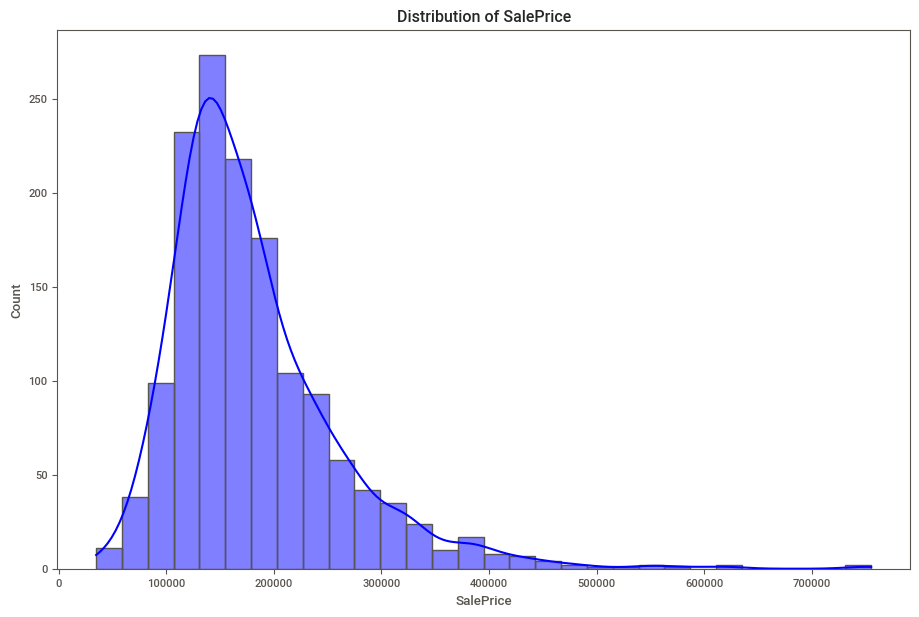

In [662]:

if show_graphs:
    plt.figure(figsize=(11, 7))
    sns.histplot(train_data['SalePrice'], kde=True, bins=30, color='blue')
    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Count')
    plt.show()

*Histogram for SalePrice*

In [663]:
if show_graphs:
    fig = px.histogram(train_data, x='SalePrice', title='Distribution of SalePrice')
    fig.show()

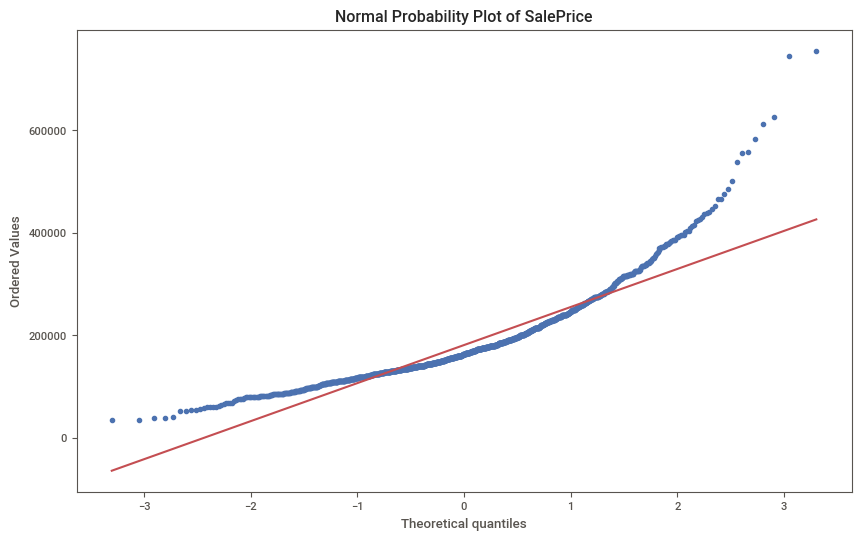

In [664]:
from scipy import stats

if show_graphs:
    plt.figure(figsize=(10, 6))
    stats.probplot(train_data['SalePrice'], dist="norm", plot=plt)
    plt.title('Normal Probability Plot of SalePrice')
    plt.show()

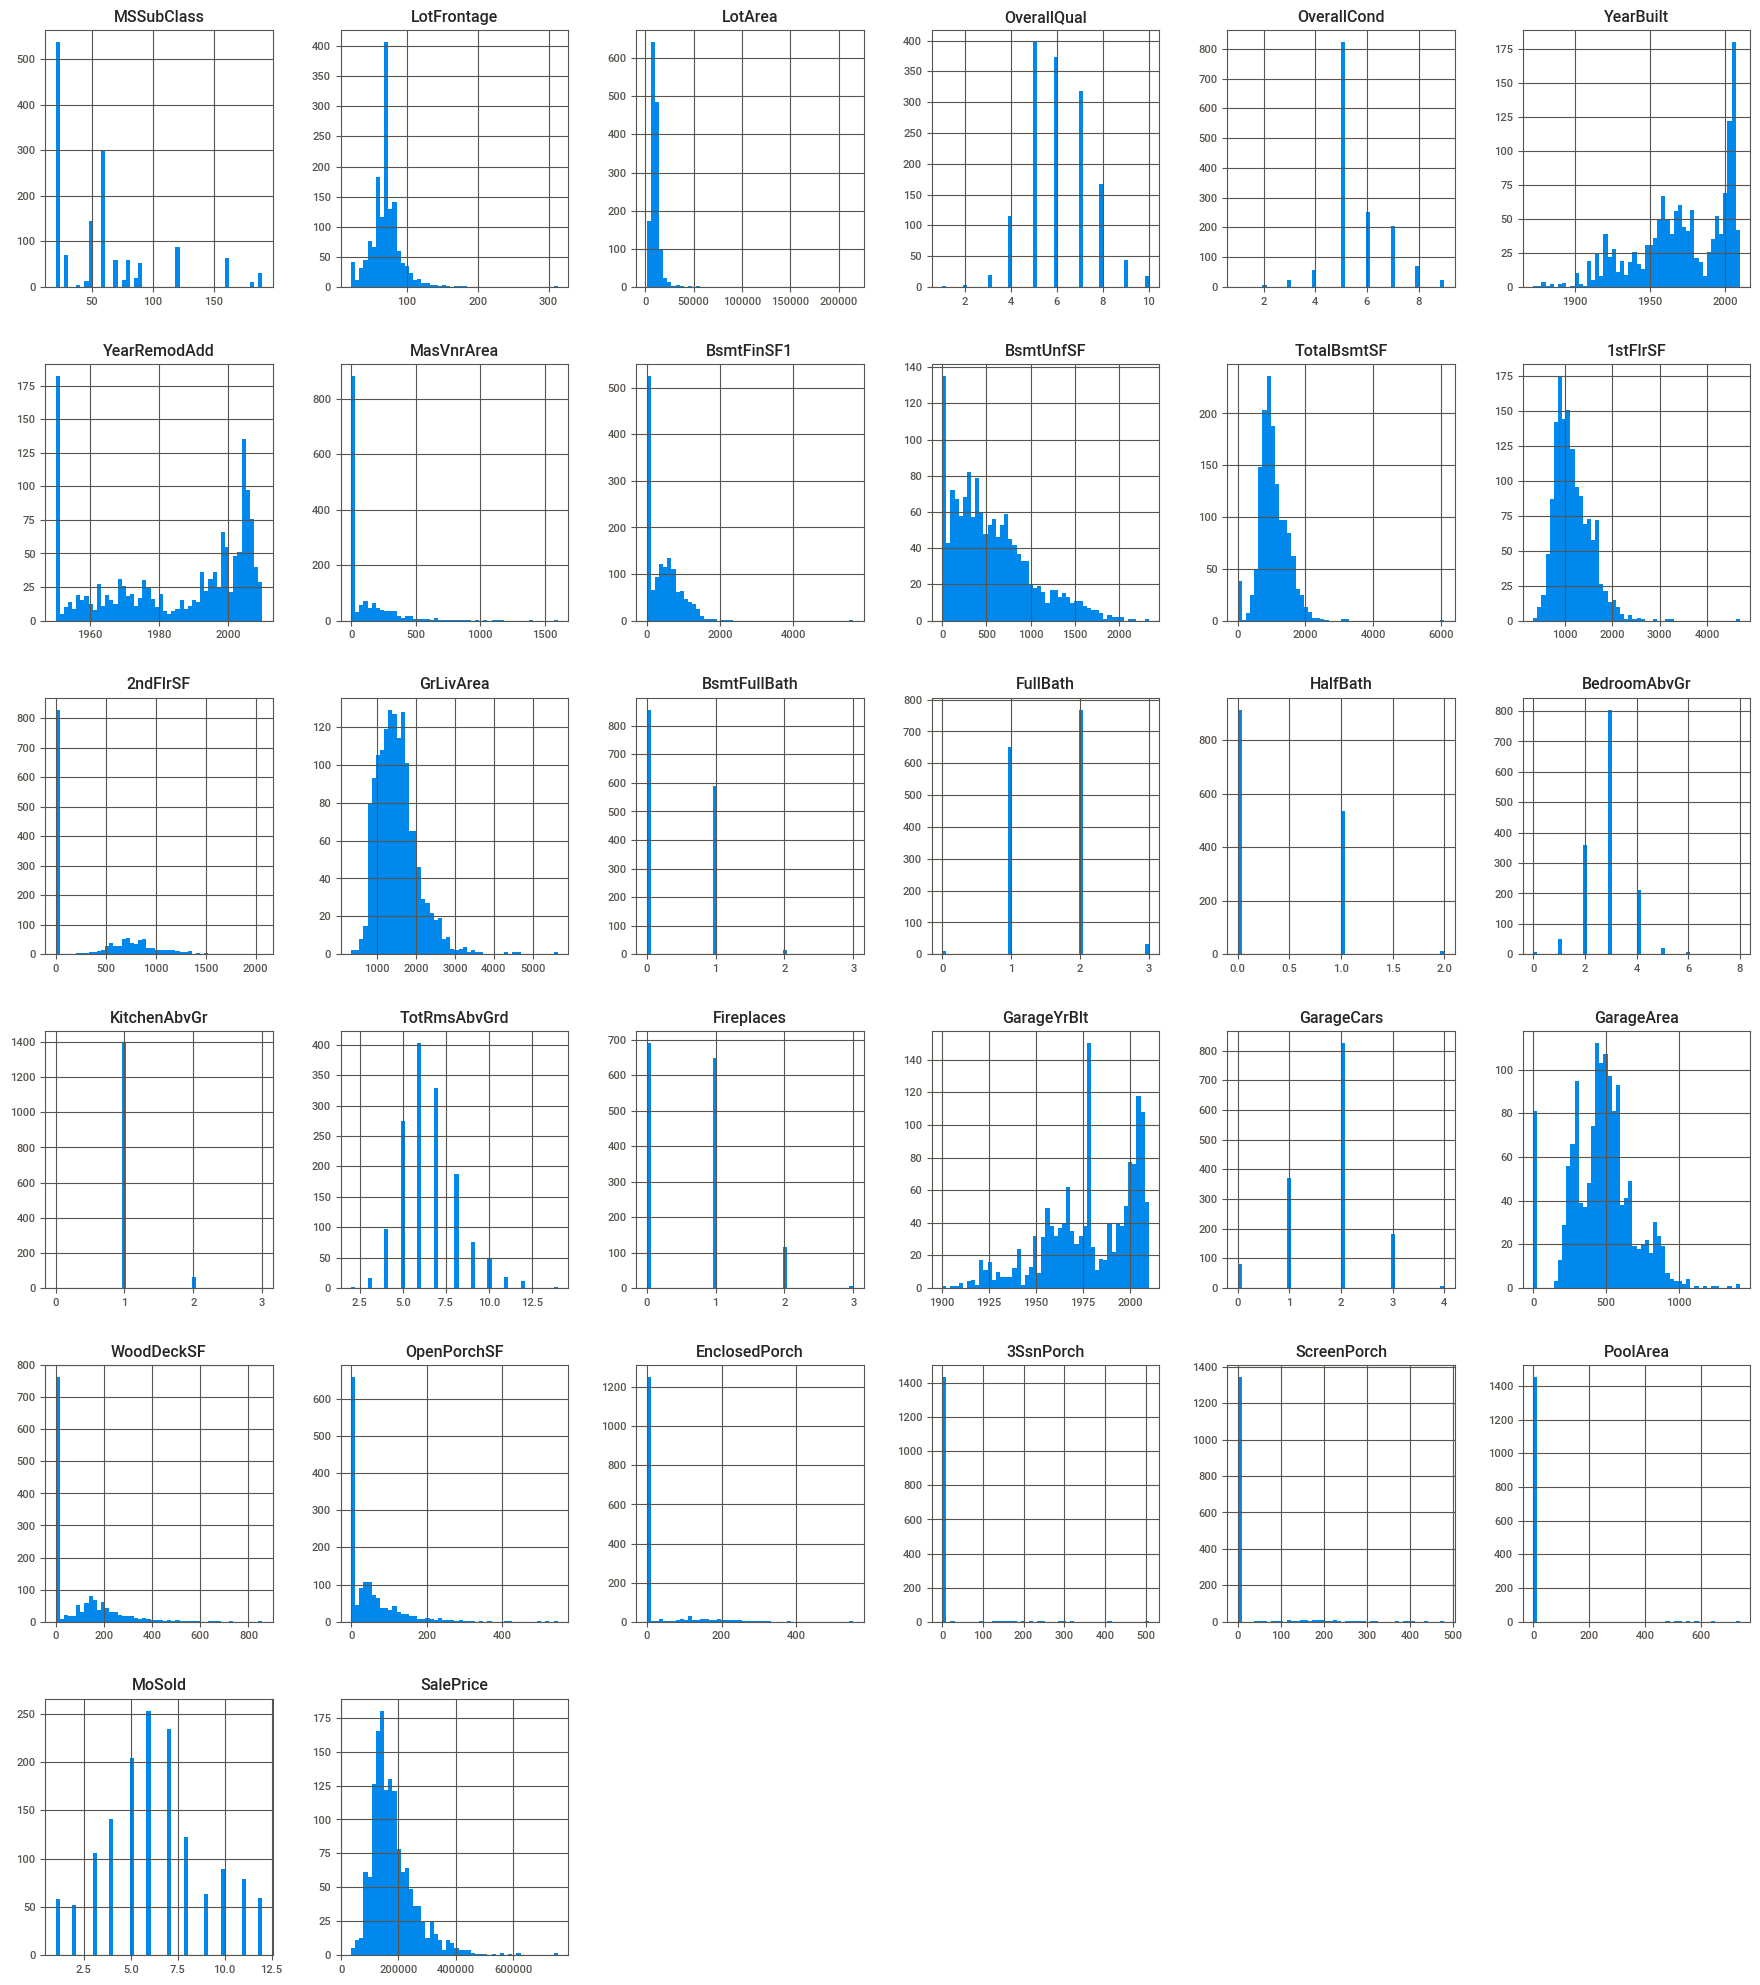

In [665]:
if show_graphs:
    train_data_num.hist(bins=50, figsize=(22, 25))
    plt.show()

In [666]:
import plotly.graph_objects as go

def show_top_correlated_features(correlation_matrix, n):
    # Display the heatmap of the correlation matrix with numbers in each cell
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        text=correlation_matrix.values.round(2),  # Round values for display
        texttemplate="%{text}",
        showscale=True))
    fig.update_layout(title=f"Top {n} Correlated Features", width=1000, height=800)
    fig.show()

In [667]:
if show_graphs:
    # Create a correlation matrix
    correlation_matrix = train_data.corr().abs()
    N = 20
    # Get the top N correlated features with the target variable
    top_correlated_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(N).index.tolist()

    # Filter the correlation matrix to get the top N correlated features
    filtered_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]
    show_top_correlated_features(filtered_correlation_matrix, N)

## Data Regularizaiton
 <br>Dropout - forward
 <br>weigh decay - backward
 <br>data augmentation

- visualize the strong & weak features <br>  
 # (AFTER FILLING THE MISSING DATA)

In [668]:
# from sklearn.linear_model import LogisticRegression

# # Select features and target
# X = train_data.drop(['SalePrice'], axis=1)
# y = train_data['SalePrice']

# # Encode categorical variables
# X = pd.get_dummies(X)

# # Initialize and fit Logistic Regression model
# log_reg = LogisticRegression(max_iter=1000, random_state=42)
# log_reg.fit(X, y)

# # Get coefficients
# coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
# coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# # Plot coefficients
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Coefficient', y='Feature', data=coefficients)
# plt.title('Feature Coefficients')
# plt.show()

In [669]:
# compare the sale price with a spesific numerical columns using a pairplot
# sns.pairplot(train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']], hue=train_data['SalePrice'])
# plt.show()